# Details on DataSet
This dataset contains information on all 802 Pokemon from all Seven Generations of Pokemon. The information contained in this dataset include Base Stats, Performance against Other Types, Height, Weight, Classification, Egg Steps, Experience Points, Abilities, etc. The information was scraped from http://serebii.net/

# Work Flow:-
Descriptive Statistics,
Data Preprocessing & Feature Engineering,
Data Analysis & Visualizations,
Models building,
hyperparameter tunnig,
GridSearchCV,
RandomSearch CV,
OneHotEncoding,
LabelEncoding.

# Import Data & Python Packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [ ]:
pokemon=pd.read_csv(r"C:\Users\Dell\Downloads\Pokemon.csv")

In [ ]:
print("The number of sameple in dataset is {}.".format(pokemon.shape[0]))

The number of sameple in dataset is 800.


In [ ]:
pokemon.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

# Check Data quality

In [ ]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


We have one column with the name # which we need to drop

In [ ]:
#Checking the type of categories in Type1
pokemon['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [ ]:
# checking the categories in type 2
pokemon['Type 2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

It has nan value

In [ ]:
# lets check how many nan value each column have
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [ ]:
#checking the nan values as well as dtypes of the data
pokemon.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 800 entries, 0 to 799

Data columns (total 13 columns):

 #   Column      Non-Null Count  Dtype 

---  ------      --------------  ----- 

 0   #           800 non-null    int64 

 1   Name        800 non-null    object

 2   Type 1      800 non-null    object

 3   Type 2      414 non-null    object

 4   Total       800 non-null    int64 

 5   HP          800 non-null    int64 

 6   Attack      800 non-null    int64 

 7   Defense     800 non-null    int64 

 8   Sp. Atk     800 non-null    int64 

 9   Sp. Def     800 non-null    int64 

 10  Speed       800 non-null    int64 

 11  Generation  800 non-null    int64 

 12  Legendary   800 non-null    bool  

dtypes: bool(1), int64(9), object(3)

memory usage: 75.9+ KB


Type 2 nan value

In [ ]:
print('Percentage of missing "Type 2" record is %.2f%%' %((pokemon['Type 2'].isnull().sum()/pokemon.shape[0])*100))

Percentage of missing "Type 2" record is 48.25%


Flying      97

Ground      35

Poison      34

Psychic     33

Fighting    26

Grass       25

Fairy       23

Steel       22

Dark        20

Dragon      18

Water       14

Ghost       14

Ice         14

Rock        14

Fire        12

Electric     6

Normal       4

Bug          3

Name: Type 2, dtype: int64


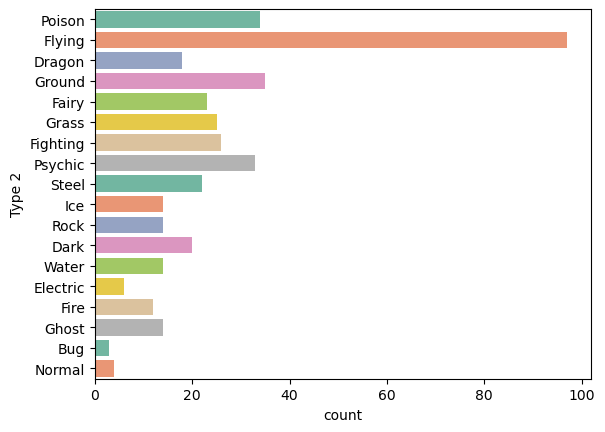

In [ ]:
print(pokemon['Type 2'].value_counts())
sns.countplot(y='Type 2', data=pokemon, palette='Set2')
plt.show()

Since we have 48.25% of records are missing, which means that imputing information and using this variable for prediction is probably not wise. We'll ignore this variable in our model.

In [ ]:
pokemon.drop(columns='Type 2',inplace=True)

In [ ]:
pokemon

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,680,80,160,60,170,130,80,6,True


Since we do not have use of # column so we will eliminate this column as well

In [ ]:
pokemon.drop(columns='#',inplace=True)

In [ ]:
pokemon

,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,600,50,100,150,100,150,50,6,True
796,DiancieMega Diancie,Rock,700,50,160,110,160,110,110,6,True
797,HoopaHoopa Confined,Psychic,600,80,110,60,150,130,70,6,True
798,HoopaHoopa Unbound,Psychic,680,80,160,60,170,130,80,6,True


# Data Visulization

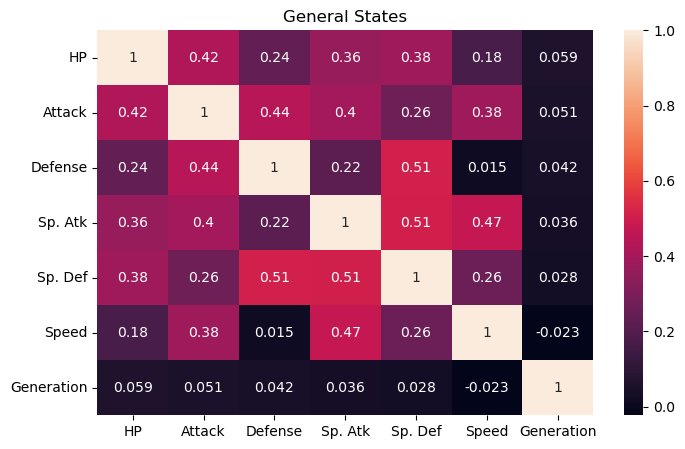

In [ ]:
col=pokemon[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Generation']]

fig,axes = plt.subplots(figsize=(8,5))
sns.heatmap(col.corr(),annot=True).set_title("General States")
plt.show()

Here in general stats we can see that:
    1.Sp.Def has with corr with Defence and sp.atk
    2.Speed has good corr with sp.atk
    3.sp.Atk has good corr with sp.Def

Exploration of Type 1 vs. With pokemon features

C:\Users\Dell\AppData\Local\Temp\ipykernel_9336\3330559041.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.

  sns.lineplot(x="Type 1", y="HP", data=pokemon,palette='mako',color='blue')

C:\Users\Dell\AppData\Local\Temp\ipykernel_9336\3330559041.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.

  sns.lineplot(x="Type 1", y="Attack", data=pokemon,palette='cubehelix',color='red')

C:\Users\Dell\AppData\Local\Temp\ipykernel_9336\3330559041.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.

  sns.lineplot(x="Type 1", y="Defense", data=pokemon,palette='YlOrBr',color='yellow')

C:\Users\Dell\AppData\Local\Temp\ipykernel_9336\3330559041.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.

  sns.lineplot(x="Type 1", y="Sp. Atk", data=pokemon,palette='dark:salmon_r',color='pink')

C:\Users\Dell\AppData\Local\Temp\ipykernel_9336\3330559041.py:21: UserWarning: Igno

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Grass'),
  Text(1, 0, 'Fire'),
  Text(2, 0, 'Water'),
  Text(3, 0, 'Bug'),
  Text(4, 0, 'Normal'),
  Text(5, 0, 'Poison'),
  Text(6, 0, 'Electric'),
  Text(7, 0, 'Ground'),
  Text(8, 0, 'Fairy'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Psychic'),
  Text(11, 0, 'Rock'),
  Text(12, 0, 'Ghost'),
  Text(13, 0, 'Ice'),
  Text(14, 0, 'Dragon'),
  Text(15, 0, 'Dark'),
  Text(16, 0, 'Steel'),
  Text(17, 0, 'Flying')])

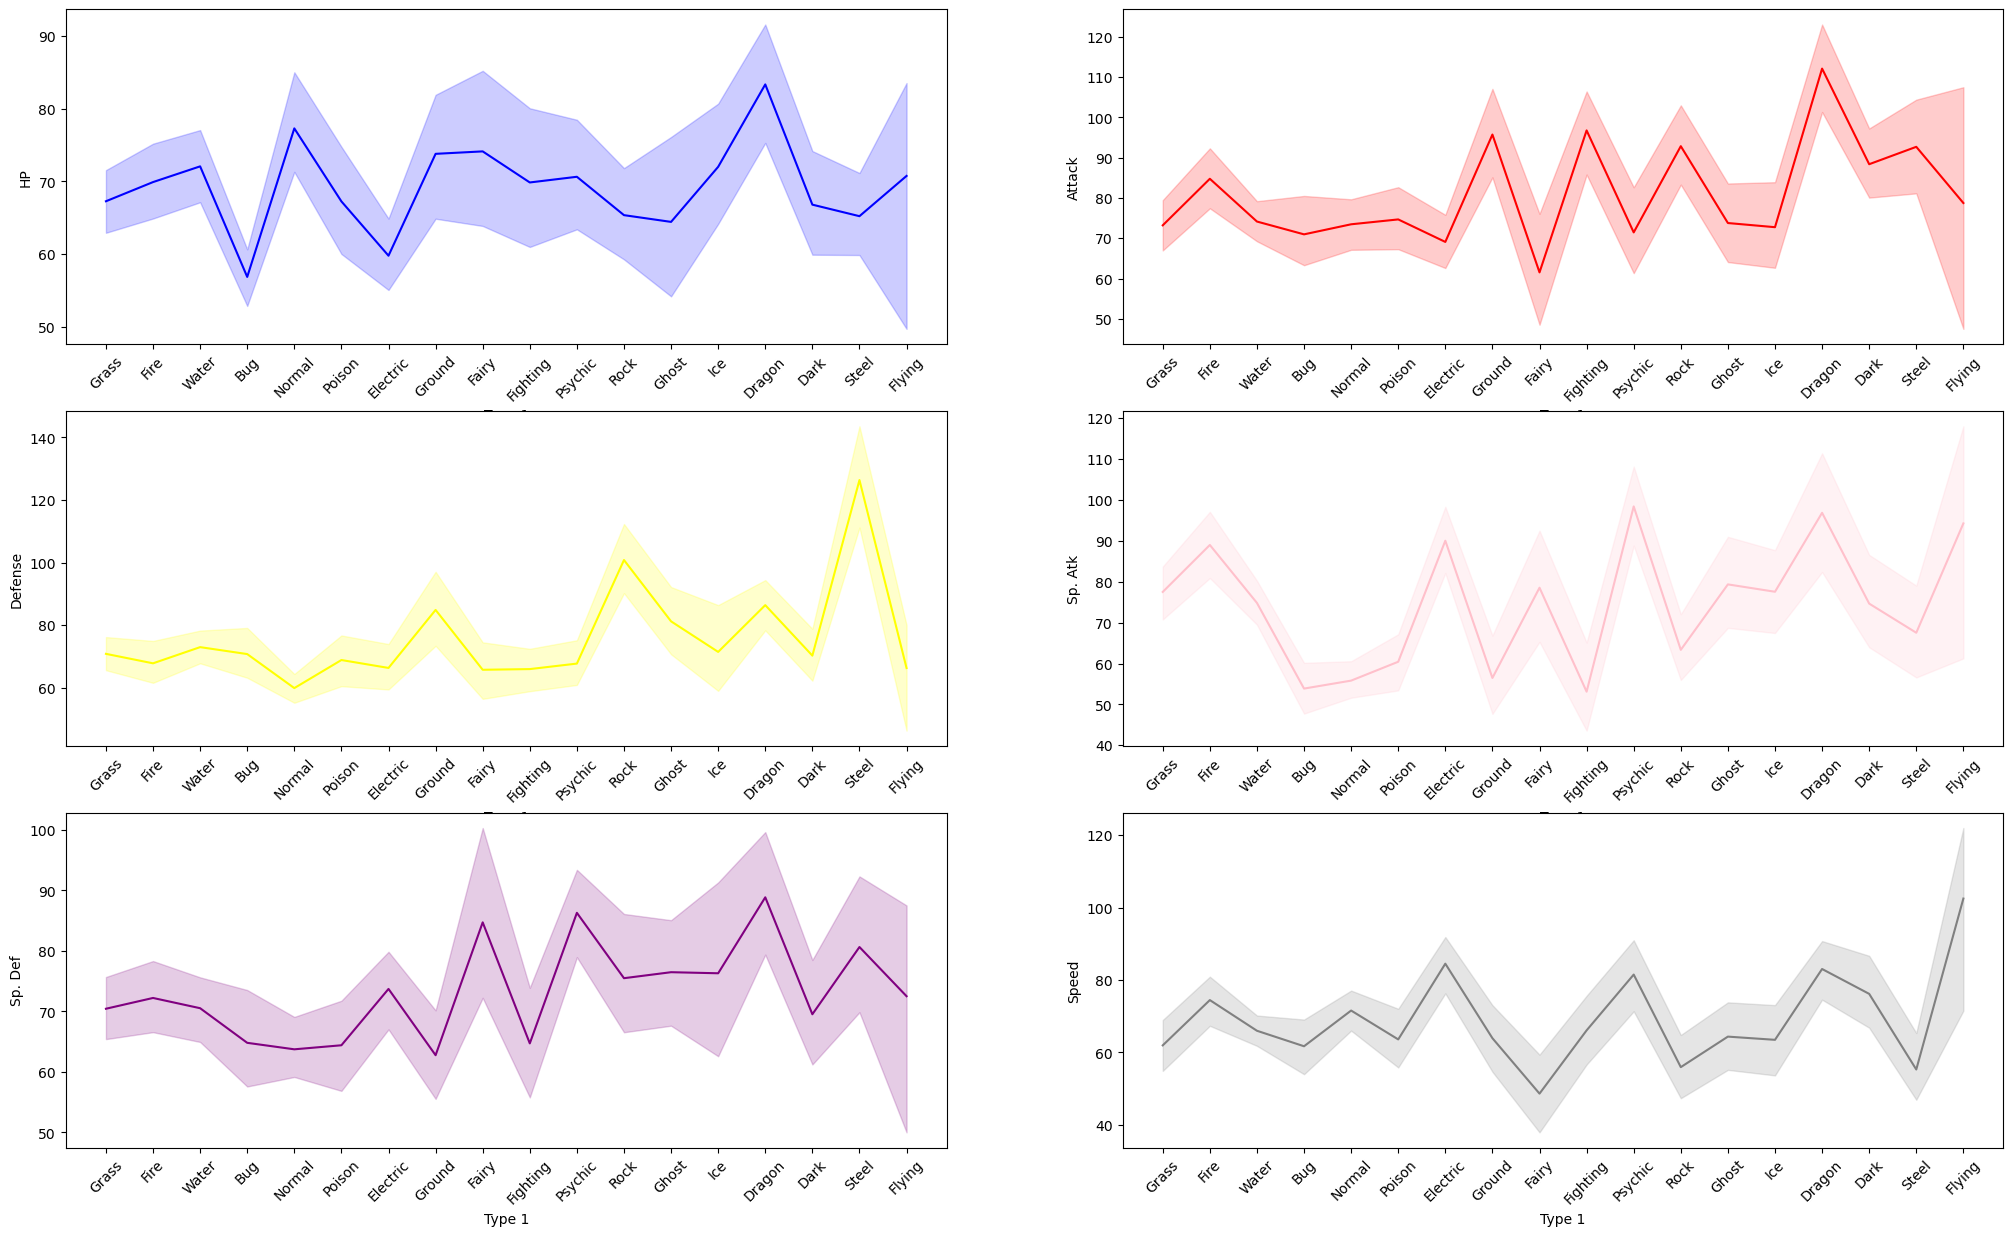

In [ ]:
plt.figure(figsize = (25, 20))


plt.subplot(4,2,1)
sns.lineplot(x="Type 1", y="HP", data=pokemon,palette='mako',color='blue')
plt.xticks(rotation=45)

plt.subplot(4,2,2)
sns.lineplot(x="Type 1", y="Attack", data=pokemon,palette='cubehelix',color='red')
plt.xticks(rotation=45)

plt.subplot(4,2,3)
sns.lineplot(x="Type 1", y="Defense", data=pokemon,palette='YlOrBr',color='yellow')
plt.xticks(rotation=45)

plt.subplot(4,2,4)
sns.lineplot(x="Type 1", y="Sp. Atk", data=pokemon,palette='dark:salmon_r',color='pink')
plt.xticks(rotation=45)

plt.subplot(4,2,5)
sns.lineplot(x="Type 1", y="Sp. Def", data=pokemon,palette='cubehelix',color='purple')
plt.xticks(rotation=45)

plt.subplot(4,2,6)
sns.lineplot(x="Type 1", y="Speed", data=pokemon,palette='dark:salmon_r',color='grey')
plt.xticks(rotation=45)


From the above plot we can clearly see that Dragon type pokemon has max HP,sp-Def,sp-attack and attack attribute,  while steel type pokemon is good with defense and in same way flying has good speed.

Exploration of Generation vs. pokemon fetures

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6')])

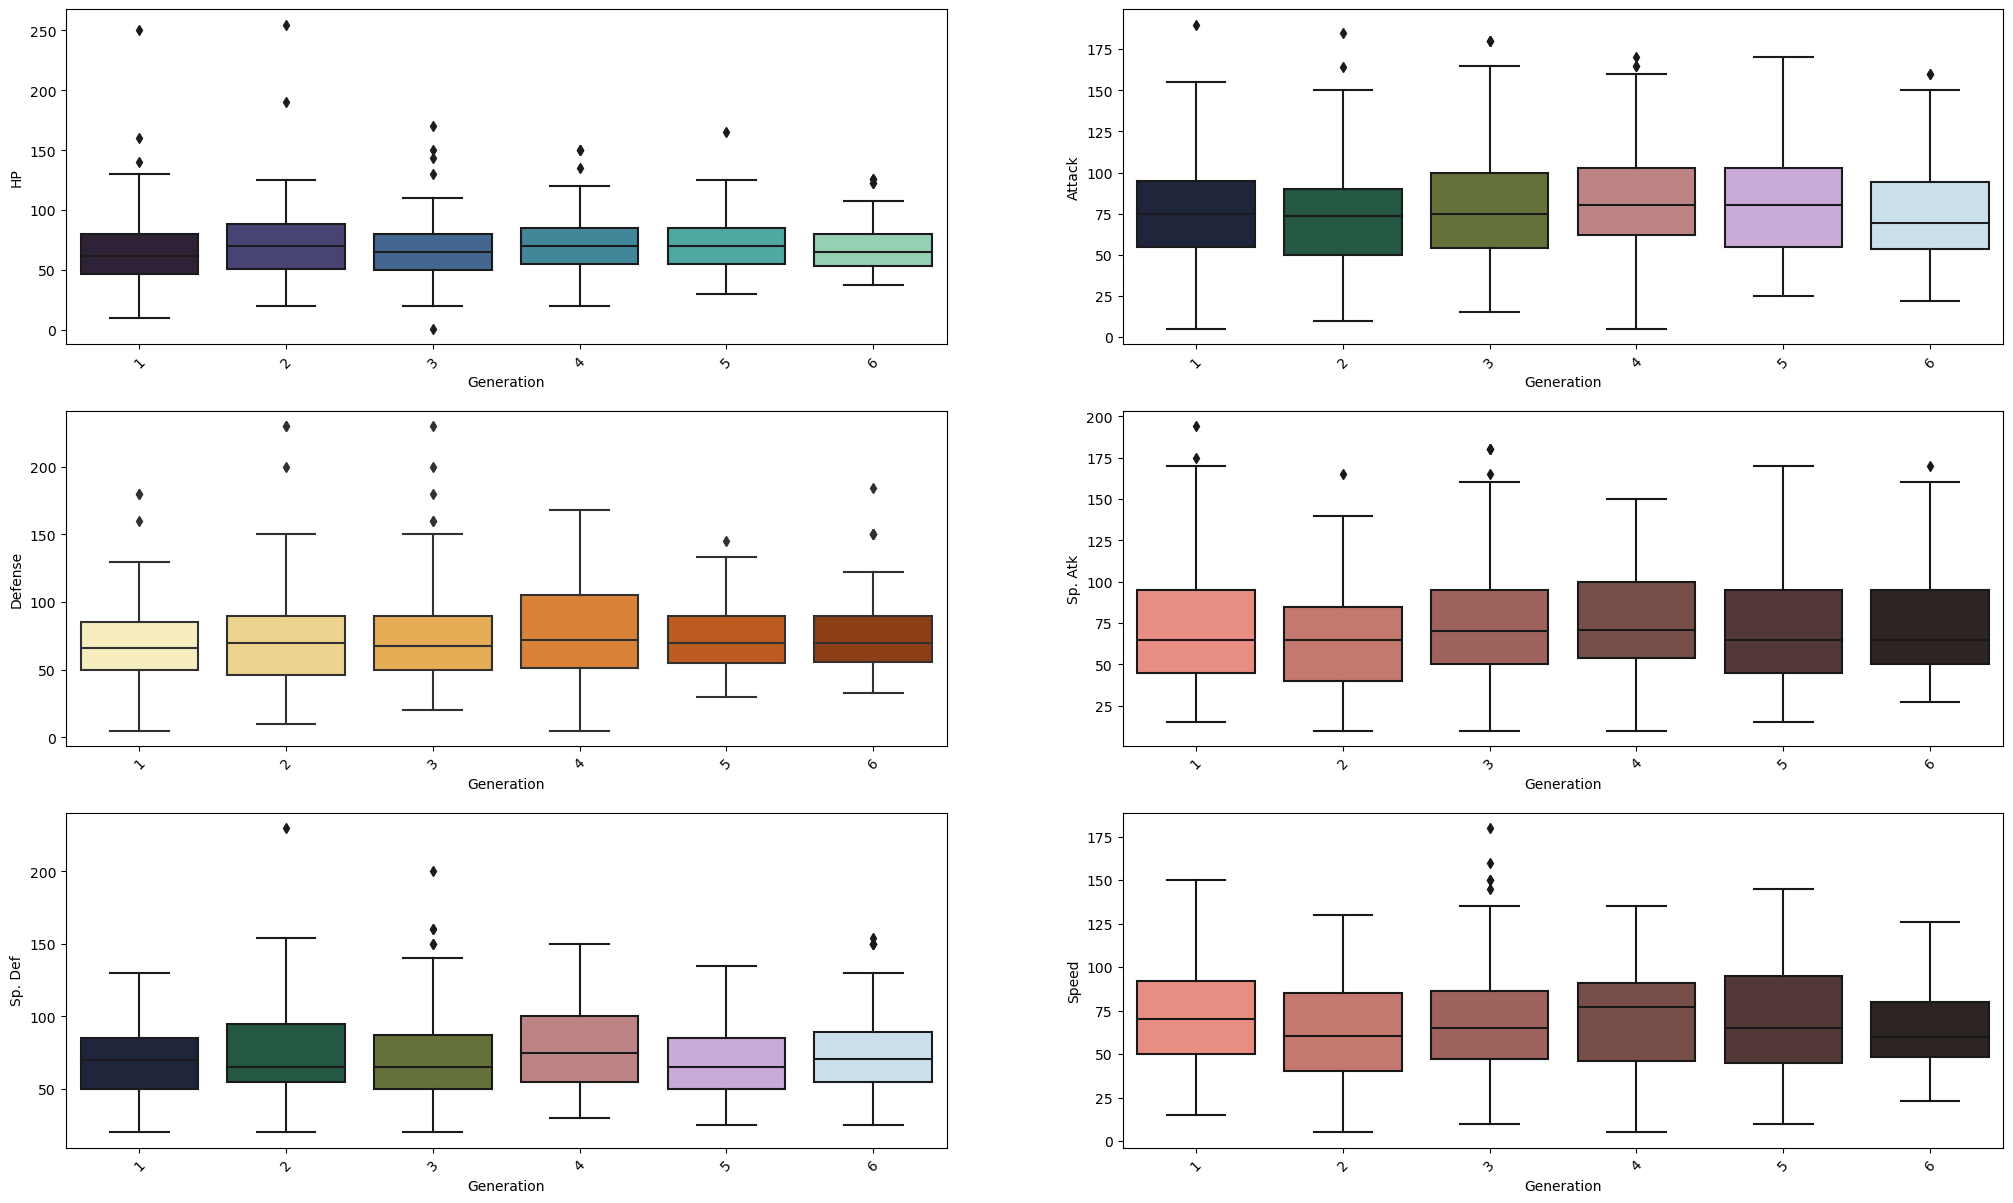

In [ ]:
plt.figure(figsize = (25, 20))


plt.subplot(4,2,1)
sns.boxplot(x="Generation", y="HP", data=pokemon,palette='mako',color='blue')
plt.xticks(rotation=45)

plt.subplot(4,2,2)
sns.boxplot(x="Generation", y="Attack", data=pokemon,palette='cubehelix',color='red')
plt.xticks(rotation=45)

plt.subplot(4,2,3)
sns.boxplot(x="Generation", y="Defense", data=pokemon,palette='YlOrBr',color='yellow')
plt.xticks(rotation=45)

plt.subplot(4,2,4)
sns.boxplot(x="Generation", y="Sp. Atk", data=pokemon,palette='dark:salmon_r',color='pink')
plt.xticks(rotation=45)

plt.subplot(4,2,5)
sns.boxplot(x="Generation", y="Sp. Def", data=pokemon,palette='cubehelix',color='purple')
plt.xticks(rotation=45)

plt.subplot(4,2,6)
sns.boxplot(x="Generation", y="Speed", data=pokemon,palette='dark:salmon_r',color='grey')
plt.xticks(rotation=45)


From the above plots we can identify which generation is performing well in each feature

What is the count of pokemons per generation

<Axes: >

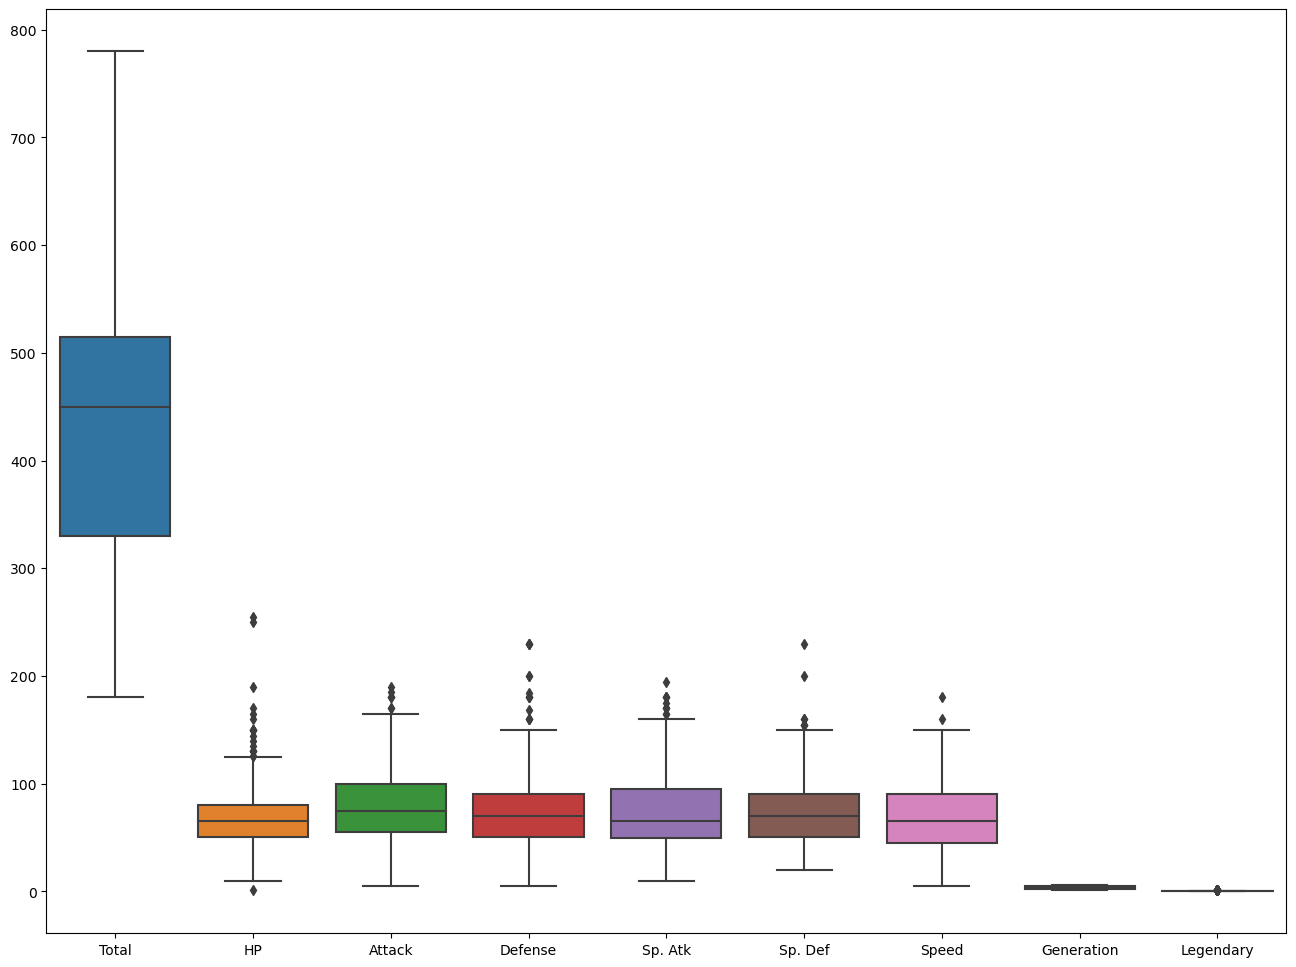

In [ ]:
plt.figure(figsize=(16,12))
sns.boxplot(data=pokemon)

From the above graph we can identify which pokemon feature is in the  best performance

Eliminate the unused features

In [ ]:
pokemon.columns

Index(['Name', 'Type 1', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [ ]:
pokemon.drop(columns={'Name','Total'},inplace=True)

we have to transform each catagorical column into numbers for better accuracy

In [ ]:
pokemon.rename(columns={'Type 1':'Type'},inplace=True)

In [ ]:
pokemon2=pd.get_dummies(pokemon,columns=['Type'],drop_first=True)

In [ ]:
pokemon2

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type_Dark,Type_Dragon,...,Type_Ghost,Type_Grass,Type_Ground,Type_Ice,Type_Normal,Type_Poison,Type_Psychic,Type_Rock,Type_Steel,Type_Water
0,45,49,49,65,65,45,1,False,0,0,...,0,1,0,0,0,0,0,0,0,0
1,60,62,63,80,80,60,1,False,0,0,...,0,1,0,0,0,0,0,0,0,0
2,80,82,83,100,100,80,1,False,0,0,...,0,1,0,0,0,0,0,0,0,0
3,80,100,123,122,120,80,1,False,0,0,...,0,1,0,0,0,0,0,0,0,0
4,39,52,43,60,50,65,1,False,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,50,100,150,100,150,50,6,True,0,0,...,0,0,0,0,0,0,0,1,0,0
796,50,160,110,160,110,110,6,True,0,0,...,0,0,0,0,0,0,0,1,0,0
797,80,110,60,150,130,70,6,True,0,0,...,0,0,0,0,0,0,1,0,0,0
798,80,160,60,170,130,80,6,True,0,0,...,0,0,0,0,0,0,1,0,0,0


We have column with onjects and in order to train our model on machine learning we need to change these objects into numbers

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
pokemon2['Legendary'] = le.fit_transform(pokemon2['Legendary'])

In [ ]:
pokemon2

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type_Dark,Type_Dragon,...,Type_Ghost,Type_Grass,Type_Ground,Type_Ice,Type_Normal,Type_Poison,Type_Psychic,Type_Rock,Type_Steel,Type_Water
0,45,49,49,65,65,45,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,60,62,63,80,80,60,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,80,82,83,100,100,80,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,80,100,123,122,120,80,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,39,52,43,60,50,65,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,50,100,150,100,150,50,6,1,0,0,...,0,0,0,0,0,0,0,1,0,0
796,50,160,110,160,110,110,6,1,0,0,...,0,0,0,0,0,0,0,1,0,0
797,80,110,60,150,130,70,6,1,0,0,...,0,0,0,0,0,0,1,0,0,0
798,80,160,60,170,130,80,6,1,0,0,...,0,0,0,0,0,0,1,0,0,0


Split the dataset into two pieces, so that the model can be trained and tested on different data

In [ ]:
x=pokemon2.drop(columns='Legendary')
y=pokemon2['Legendary']

Because we have dataset in hundreds and on tense to bring all column in equal scale we are using standard scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x)
x_scaled=scaler.transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=10)

Inorder to get the best performing model we have call four machine learning algorithm.

In [ ]:
lr=LogisticRegression()
rf=RandomForestClassifier()
gb = GradientBoostingClassifier()
svc = SVC()

In [ ]:
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)
accuracy_score(y_test,lr_pred)

0.95

In [ ]:
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
rf_accuracy=accuracy_score(y_test,rf_pred)
rf_accuracy

0.95

In [ ]:
gb.fit(X_train,y_train)
gb_pred=gb.predict(X_test)
accuracy_score(y_test,gb_pred)

0.93125

In [ ]:
svc.fit(X_train,y_train)
svc_pred=svc.predict(X_test)
accuracy_score(y_test,svc_pred)

0.94375

In [ ]:
rf = RandomForestClassifier(max_samples=0.75,random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.95

In simple terms, Cross-Validation is a technique used to assess how well our Machine learning models perform on unseen data. we are checking the performance of model on untrained data

In [ ]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(RandomForestClassifier(max_samples=0.75),x,y,cv=10,scoring='accuracy'))

0.9375

We will check bith parameter to test which one improve our accuracy

# GridSearchCV

Grid searchCV is good for small dataset

In [ ]:
# Number of trees in random forest
n_estimator=[20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_debth=[2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

In [ ]:
param_grid={'n_estimators':n_estimator,
           'max_features':max_features,
           'max_depth':max_debth,
           'max_samples':max_samples}
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [ ]:
rf=RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV

rf_grid=GridSearchCV(estimator =rf,
                   param_grid=param_grid,
                     cv=5,
                     verbose=5,
                     n_jobs=-1)

In [ ]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=5)

In [ ]:
rf_grid.best_params_

{'max_depth': 8, 'max_features': 0.2, 'max_samples': 0.75, 'n_estimators': 60}

In [ ]:
rf_grid.best_score_

0.9546875

# RandomSearchCV

This hyperparameter is good for large dataset

In [ ]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# Bootstrap samples
bootstrap = [True,False]

# Minimum number of samples required to split a node
min_samples_split = [2, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

In [ ]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples,
              'bootstrap':bootstrap,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0], 'bootstrap': [True, False], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = RandomizedSearchCV(estimator = rf,
                       param_distributions = param_grid,
                       cv = 5,
                       verbose=2,
                       n_jobs = -1)

In [ ]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 

30 fits failed out of a total of 50.

The score on these train-test partitions for these parameters will be set to nan.

If these failures are not expected, you can try to debug them by setting error_score='raise'.



Below are more details about the failures:

--------------------------------------------------------------------------------

30 fits failed with the following error:

Traceback (most recent call last):

  File "C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score

    estimator.fit(X_train, y_train, **fit_params)

  File "C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 397, in fit

    raise ValueError(

ValueError: `max_sample` cannot be set if `bootstrap=False`. Either switch to `bootstrap=True` or set `max_sample=None`.



  warnings.warn(some_fits_failed_message, FitFailedWarni

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 8, None],
                                        'max_features': [0.2, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [20, 60, 100, 120]},
                   verbose=2)

In [ ]:
rf_grid.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_samples': 1.0,
 'max_features': 1.0,
 'max_depth': None,
 'bootstrap': True}

In [ ]:
rf_grid.best_score_

0.9484375